In [29]:
import pandas as pd
import os

In [30]:
def modify_float(num):
    try:
        return str(round(float(num),1))
    except:
        return num
def compute_results(df):
    correctness = 0
    sc_correctness = 0
    mad_correctness = 0
    rerailer_correctness = 0
    for row_index in range(len(df)):
        row = df.iloc[row_index]
        correct_ans = row['Correct_Answer'].lower()
        output_answer = row['Cot_random_answer'].lower()
        sc_answer = row['Smv_Answer'].lower()
        # judge_answer = row['Output_Answer'].lower()
        mad_answer = modify_float(row['MAD_Answer']).lower()
        rerailer_ans = row['Corrected COT Answer'].lower()
        if correct_ans == output_answer[0]:
            correctness += 1
        else:
            correctness += 0
        if correct_ans == sc_answer[0]:
            sc_correctness += 1
        else:
            sc_correctness += 0
        if correct_ans == mad_answer[0]:
            mad_correctness += 1
        else:
            mad_correctness += 0
        if correct_ans == rerailer_ans[0]:
            rerailer_correctness += 1
        else:
            rerailer_correctness += 0
    
    result_dict={
        'CoT':round(correctness/len(df),3),
        'SC':round(sc_correctness/len(df),3),
        'MAD':round(mad_correctness/len(df),3),
        'Rerailer':round(rerailer_correctness/len(df),3)
    }
    return result_dict

In [39]:
df_3 = pd.read_csv('../result/gpt3.5_results.csv')
df_4 = pd.read_csv('../result/gpt4_results.csv')
df_claude = pd.read_csv('../result/claude_results.csv')

In [40]:
df_3.Category.value_counts()

Category
Math                        295
Challenging Math            288
disambiguation_qa           200
elementary_mathematics       99
jurisprudence                99
date_understanding           99
professional_law             99
college_biology              98
international_law            98
high_school_statistics       97
philosophy                   96
business_ethics              96
college_physics              96
college_computer_science     96
electrical_engineering       96
abstract_algebra             95
college_medicine             94
professional_accounting      91
college_chemistry            83
college_mathematics          81
formal_logic                 78
Name: count, dtype: int64

In [41]:
category_mapping = {
    'Math': ['Math', 'elementary_mathematics', 'high_school_statistics', 'abstract_algebra', 'formal_logic'],
    'Advanced Math and Science': ['Challenging Math', 'college_biology', 'college_physics', 'college_medicine', 'college_chemistry', 'college_mathematics','college_computer_science', 'electrical_engineering','professional_accounting'],
    'Commonsense Reasoning': ['disambiguation_qa', 'jurisprudence', 'date_understanding', 'professional_law', 'international_law', 'philosophy', 'business_ethics']
}
reverse_mapping = {}
for new_cat, old_cats in category_mapping.items():
    for old_cat in old_cats:
        reverse_mapping[old_cat] = new_cat

# Map the old categories to new categories
df_3['Big_Category'] = df_3['Category'].map(reverse_mapping)
df_claude['Big_Category'] = df_claude['Category'].map(reverse_mapping)
df_4['Big_Category'] = df_4['Category'].map(reverse_mapping)

In [124]:
results_li = []
result = compute_results(df_3)
result['Model'] = 'gpt-3.5-turbo'
result['Category'] = 'all'
results_li.append(pd.DataFrame(result, index=[0]))
for cate in set(df_3.Big_Category.tolist()):
    df_temp = df_3[df_3['Big_Category']==cate]
    result = compute_results(df_temp)
    result['Model'] = 'gpt-3.5-turbo'
    result['Category'] = cate
    results_li.append(pd.DataFrame(result, index=[0]))
df_result_3 = pd.concat(results_li,ignore_index=True)[['Category','Model','CoT','SC','MAD','Rerailer']]
df_result_3

,Category,Model,CoT,SC,MAD,Rerailer
0,all,gpt-3.5-turbo,0.675,0.692,0.697,0.730
1,Math,gpt-3.5-turbo,0.625,0.640,0.667,0.694
2,Commonsense Reasoning,gpt-3.5-turbo,0.727,0.738,0.727,0.740
3,Advanced Math and Science,gpt-3.5-turbo,0.669,0.690,0.693,0.745


In [125]:
results_li = []
result = compute_results(df_claude)
result['Model'] = 'claude-3-sonnet'
result['Category'] = 'all'
results_li.append(pd.DataFrame(result, index=[0]))
for cate in set(df_claude.Big_Category.tolist()):
    df_temp = df_claude[df_claude['Big_Category']==cate]
    result = compute_results(df_temp)
    result['Model'] = 'claude-3-sonnet'
    result['Category'] = cate
    results_li.append(pd.DataFrame(result, index=[0]))
df_result_claude = pd.concat(results_li,ignore_index=True)[['Category','Model','CoT','SC','MAD','Rerailer']]
df_result_claude

,Category,Model,CoT,SC,MAD,Rerailer
0,all,claude-3-sonnet,0.686,0.705,0.688,0.722
1,Math,claude-3-sonnet,0.652,0.667,0.654,0.669
2,Commonsense Reasoning,claude-3-sonnet,0.718,0.736,0.717,0.757
3,Advanced Math and Science,claude-3-sonnet,0.683,0.706,0.688,0.729


In [126]:
results_li = []
result = compute_results(df_4)
result['Model'] = 'gpt-4'
result['Category'] = 'all'
results_li.append(pd.DataFrame(result, index=[0]))
for cate in set(df_4.Big_Category.tolist()):
    df_temp = df_4[df_4['Big_Category']==cate]
    result = compute_results(df_temp)
    result['Model'] = 'gpt-4'
    result['Category'] = cate
    results_li.append(pd.DataFrame(result, index=[0]))
df_result_4 = pd.concat(results_li,ignore_index=True)[['Category','Model','CoT','SC','MAD','Rerailer']]
df_result_4

,Category,Model,CoT,SC,MAD,Rerailer
0,all,gpt-4,0.694,0.711,0.708,0.748
1,Math,gpt-4,0.675,0.690,0.689,0.716
2,Commonsense Reasoning,gpt-4,0.728,0.740,0.746,0.760
3,Advanced Math and Science,gpt-4,0.680,0.701,0.692,0.759


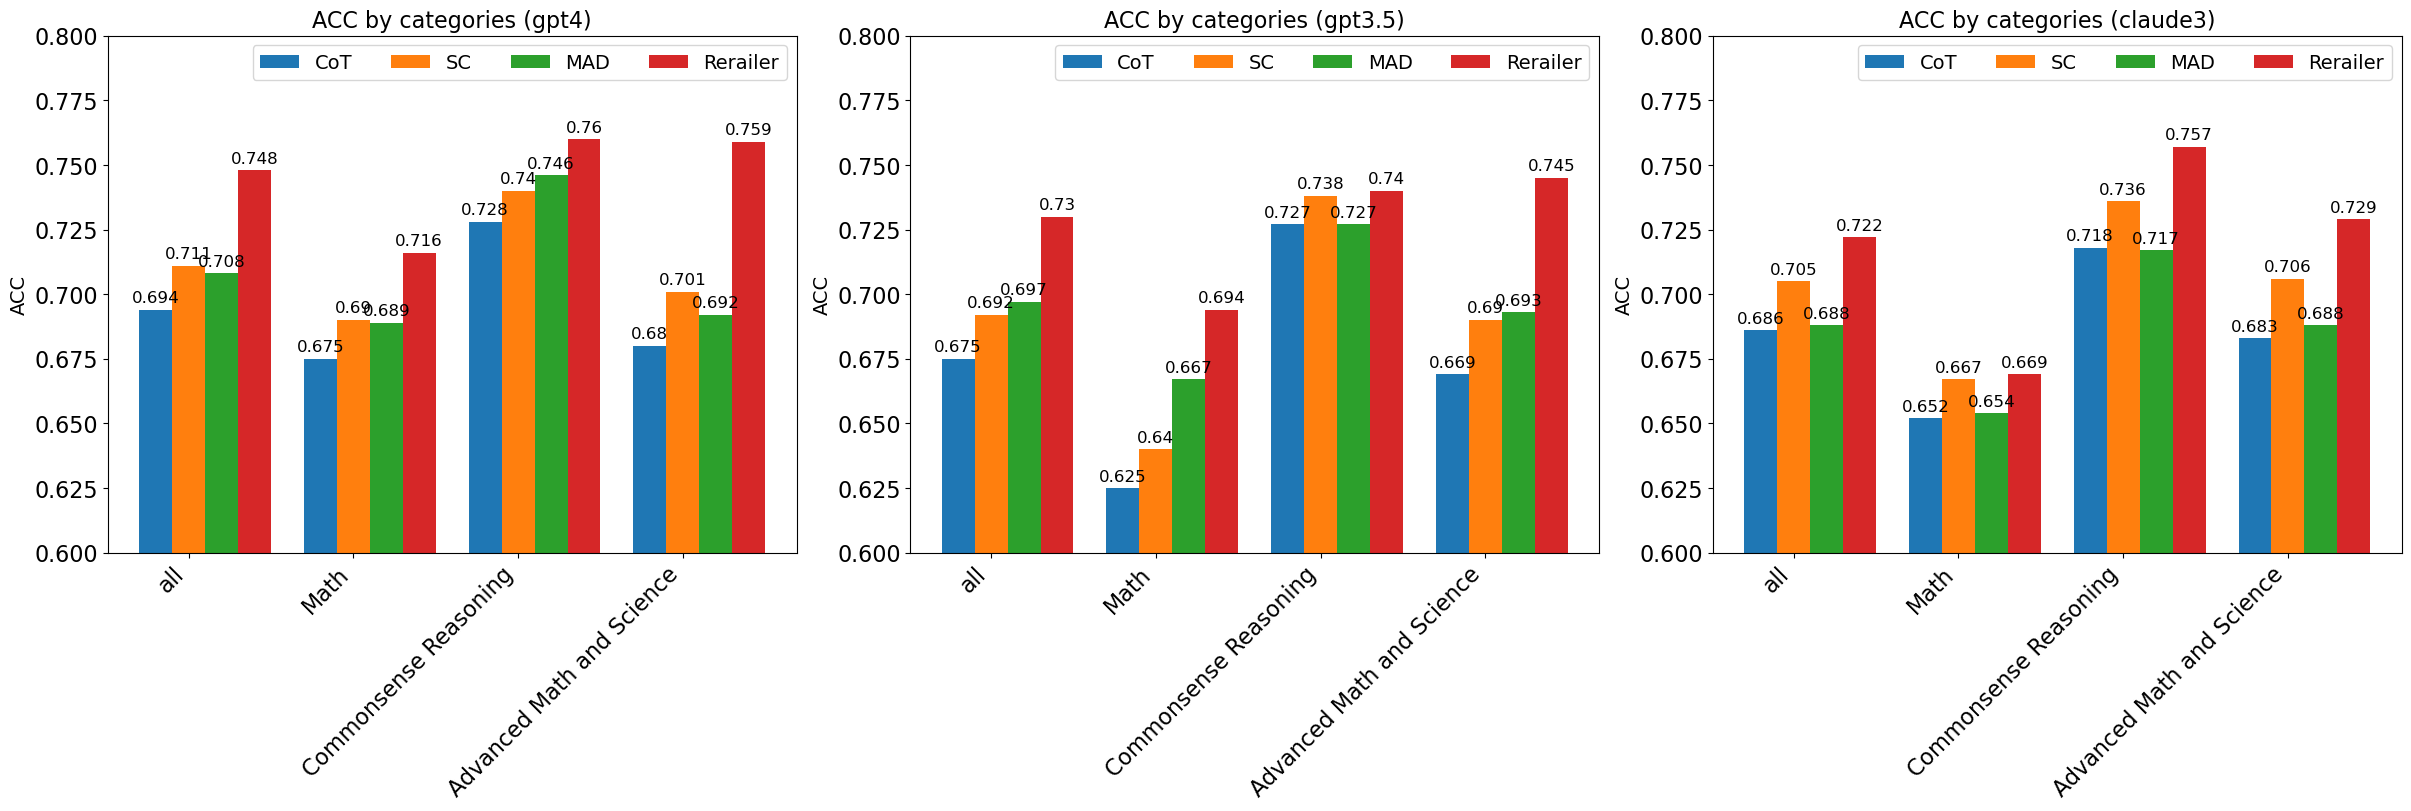

In [128]:
import matplotlib.pyplot as plt
import numpy as np

def get_plot(df, model, chunk_size=4, ax=None, fontsize=12):
    categories = tuple(df.Category.tolist())
    result = {'CoT': tuple(df.CoT.tolist()),
              'SC': tuple(df.SC.tolist()),
              'MAD': tuple(df.MAD.tolist()),
              'Rerailer': tuple(df.Rerailer.tolist()),
              # Add more columns here if needed
              }

    num_categories = len(categories)
    num_chunks = (num_categories + chunk_size - 1) // chunk_size  # Calculate number of chunks
    width = 0.20  # the width of the bars

    for chunk in range(num_chunks):
        start_idx = chunk * chunk_size
        end_idx = min(start_idx + chunk_size, num_categories)

        chunk_categories = categories[start_idx:end_idx]
        chunk_result = {k: v[start_idx:end_idx] for k, v in result.items()}
        x = np.arange(len(chunk_categories))  # the label locations

        if ax is None:
            plt.figure(figsize=(16, 8))
            fig, ax = plt.subplots(layout='constrained')

        multiplier = 0
        for attribute, measurement in chunk_result.items():
            offset = width * multiplier
            rects = ax.bar(x + offset, measurement, width, label=attribute)
            ax.bar_label(rects, padding=3, fontsize=fontsize - 2)
            multiplier += 1

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel('ACC', fontsize=fontsize)
        ax.set_title(f'ACC by categories ({model})', fontsize=fontsize+2)
        ax.set_xticks(x + width)
        ax.set_xticklabels(chunk_categories, rotation=45, ha='right', fontsize=fontsize)  # Rotate x-axis labels
        ax.legend(loc='best', ncols=4, fontsize=fontsize)
        ax.set_ylim(0.6, 0.8)
        ax.tick_params(axis='both', which='major', labelsize=fontsize+2)

# Create a figure with 3 subplots in a row
fig, axs = plt.subplots(1, 3, figsize=(24, 8), constrained_layout=True)

# Plot the bar plots with increased font size
get_plot(df_result_4, 'gpt4', ax=axs[0], fontsize=14)
get_plot(df_result_3, 'gpt3.5', ax=axs[1], fontsize=14)
get_plot(df_result_claude, 'claude3', ax=axs[2], fontsize=14)

plt.show()


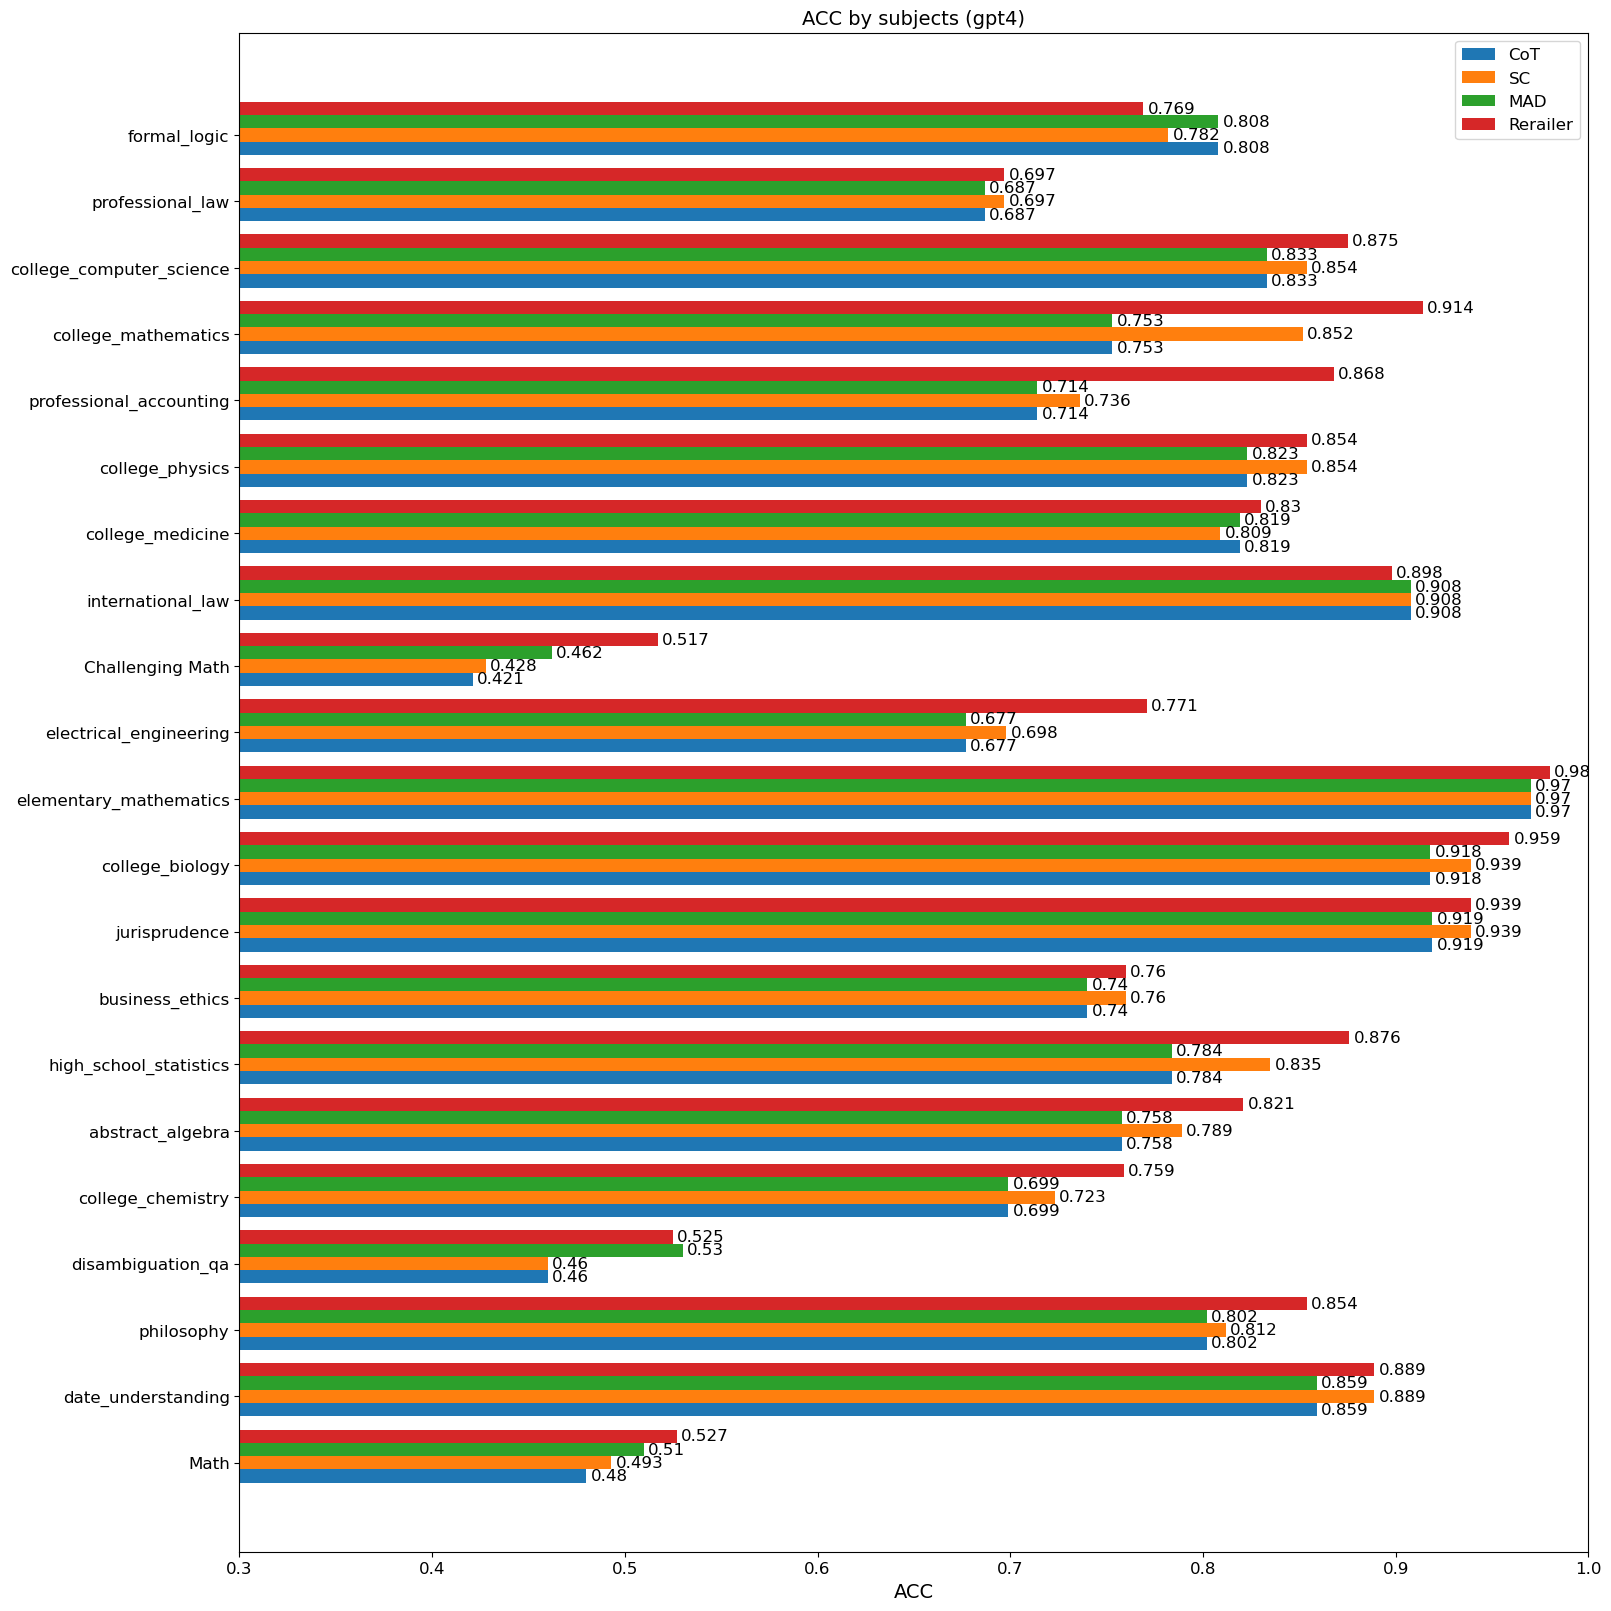

In [131]:
import matplotlib.pyplot as plt
import numpy as np
results_li = []
for cate in set(df_3.Category.tolist()):
    df_temp = df_3[df_3['Category']==cate]
    result = compute_results(df_temp)
    result['Model'] = 'gpt-3.5-turbo'
    result['Category'] = cate
    results_li.append(pd.DataFrame(result, index=[0]))
df_result_3 = pd.concat(results_li,ignore_index=True)[['Category','Model','CoT','SC','MAD','Rerailer']]


results_li = []
for cate in set(df_claude.Category.tolist()):
    df_temp = df_claude[df_claude['Category']==cate]
    result = compute_results(df_temp)
    result['Model'] = 'claude-3-sonnet'
    result['Category'] = cate
    results_li.append(pd.DataFrame(result, index=[0]))
df_result_claude = pd.concat(results_li,ignore_index=True)[['Category','Model','CoT','SC','MAD','Rerailer']]


results_li = []
for cate in set(df_4.Category.tolist()):
    df_temp = df_4[df_4['Category']==cate]
    result = compute_results(df_temp)
    result['Model'] = 'gpt-4'
    result['Category'] = cate
    results_li.append(pd.DataFrame(result, index=[0]))
df_result_4 = pd.concat(results_li,ignore_index=True)[['Category','Model','CoT','SC','MAD','Rerailer']]

def get_horizontal_plot(df, model, ax=None, fontsize=12):
    categories = tuple(df.Category.tolist())
    result = {'CoT': tuple(df.CoT.tolist()),
              'SC': tuple(df.SC.tolist()),
              'MAD': tuple(df.MAD.tolist()),
              'Rerailer': tuple(df.Rerailer.tolist()),
              # Add more columns here if needed
              }

    num_categories = len(categories)
    height = 0.20  # the height of the bars

    y = np.arange(num_categories)  # the label locations

    if ax is None:
        plt.figure(figsize=(16, 8))
        fig, ax = plt.subplots(layout='constrained')

    multiplier = 0
    for attribute, measurement in result.items():
        offset = height * multiplier
        rects = ax.barh(y + offset, measurement, height, label=attribute)
        ax.bar_label(rects, padding=3, fontsize=fontsize - 2)
        multiplier += 1

    # Add some text for labels, title and custom y-axis tick labels, etc.
    ax.set_xlabel('ACC', fontsize=fontsize)
    ax.set_title(f'ACC by subjects ({model})', fontsize=fontsize)
    ax.set_yticks(y + height)
    ax.set_yticklabels(categories, rotation=0, ha='right', fontsize=fontsize - 2)  # Rotate y-axis labels
    ax.legend(loc='best', ncols=1, fontsize=fontsize - 2)
    ax.set_xlim(0.3, 1)
    ax.tick_params(axis='both', which='major', labelsize=fontsize - 2)

# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(16, 16), constrained_layout=True)

# Plot the horizontal bar plot with increased font size for GPT-4
get_horizontal_plot(df_result_4, 'gpt4', ax=ax, fontsize=14)

plt.show()

In [81]:
correctness = []
sc_correctness = []
mad_correctness = []
rerailer_correctness = []
for row_index in range(len(df_4)):
    row = df_4.iloc[row_index]
    correct_ans = row['Correct_Answer'].lower()
    output_answer = row['Cot_random_answer'].lower()
    sc_answer = row['Smv_Answer'].lower()
    # judge_answer = row['Output_Answer'].lower()
    mad_answer = modify_float(row['MAD_Answer']).lower()
    rerailer_ans = row['Corrected COT Answer'].lower()
    if correct_ans == output_answer[0]:
        correctness.append(1)
    else:
        correctness.append(0)
    if correct_ans == sc_answer[0]:
        sc_correctness.append(1)
    else:
        sc_correctness.append(0)
    if correct_ans == mad_answer[0]:
        mad_correctness.append(1)
    else:
        mad_correctness.append(0)
    if correct_ans == rerailer_ans[0]:
        rerailer_correctness.append(1)
    else:
        rerailer_correctness.append(0)

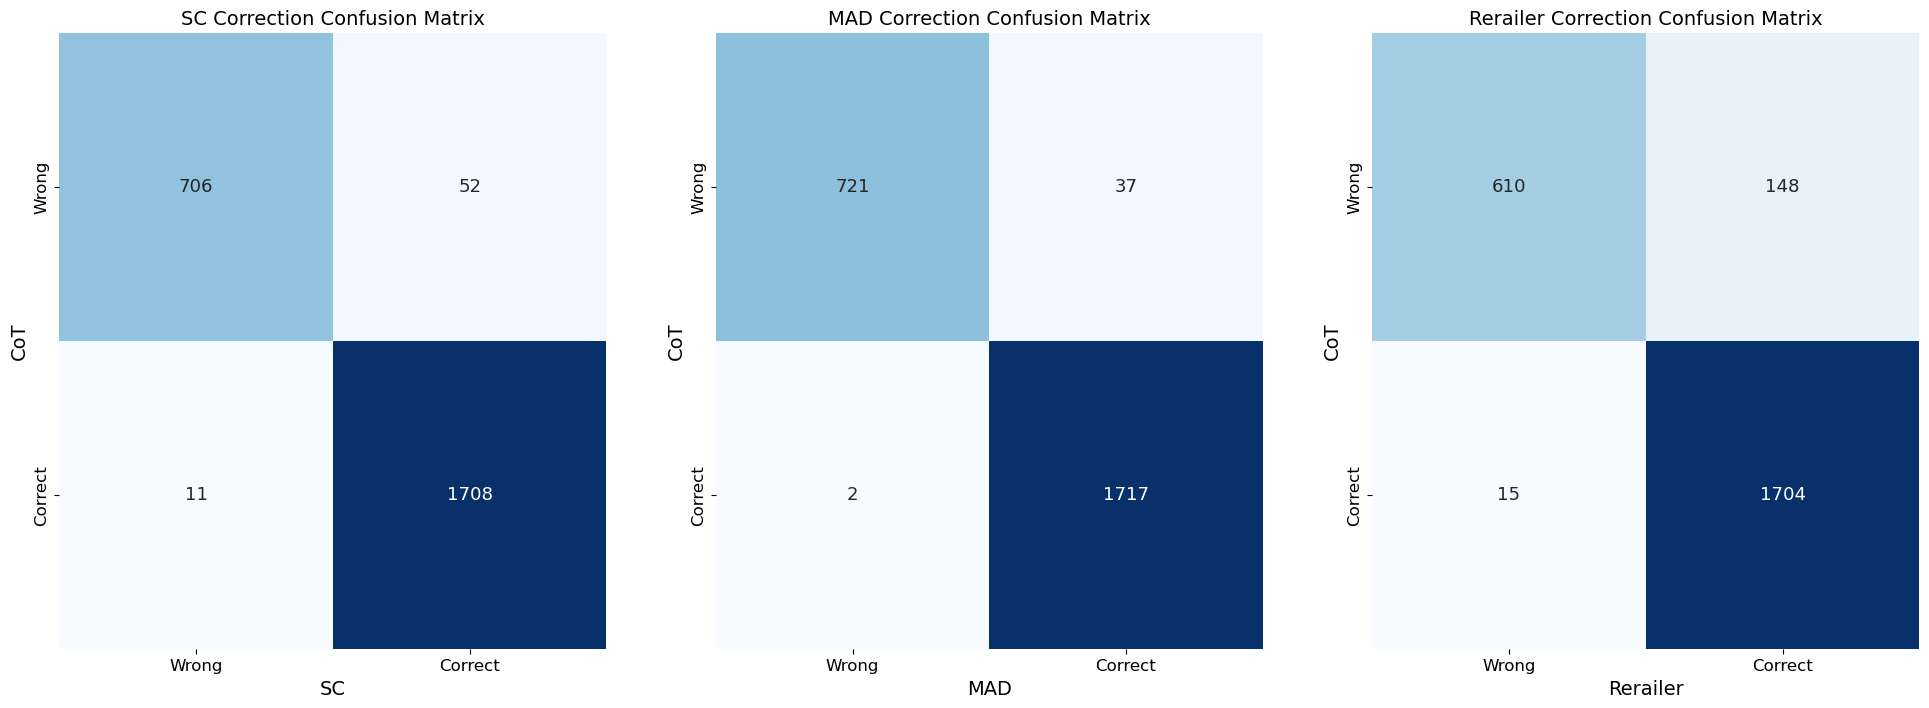

In [103]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(ax, cm, title, xlabel, ylabel, fontsize=12):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax, 
                xticklabels=['Wrong', 'Correct'], yticklabels=['Wrong', 'Correct'],
                annot_kws={"size": fontsize - 1})
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.set_title(title, fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize - 2)

# Sample true labels and predicted labels
cot = correctness
sc_correctness = sc_correctness
mad_correctness = mad_correctness
rerailer_correctness = rerailer_correctness

# Compute the confusion matrices
cm_sc = confusion_matrix(cot, sc_correctness)
cm_mad = confusion_matrix(cot, mad_correctness)
cm_rerailer = confusion_matrix(cot, rerailer_correctness)

# Create a figure with 3 subplots in a row
fig, axs = plt.subplots(1, 3, figsize=(24, 8))

# Plot the confusion matrices with increased font size
plot_confusion_matrix(axs[0], cm_sc, 'SC Correction Confusion Matrix', 'SC', 'CoT', fontsize=14)
plot_confusion_matrix(axs[1], cm_mad, 'MAD Correction Confusion Matrix', 'MAD', 'CoT', fontsize=14)
plot_confusion_matrix(axs[2], cm_rerailer, 'Rerailer Correction Confusion Matrix', 'Rerailer', 'CoT', fontsize=14)

plt.show()


# cost analysis

In [27]:
from openai import OpenAI
client = OpenAI(api_key=api_key)

completion = client.chat.completions.create(
  model="gpt-4",
  messages=[
    {"role": "system", "content": "You are an expert in college math assistant, skilled in explaining complex programming concepts with creative flair. Help me answer question step by step. clearly state your reasoning path and final answer"},
    {"role": "user", "content": "Let y = f(x) be a solution of the differential equation x dy + (y - xe^x) dx = 0 such that y = 0 when x = 1. What is the value of f(2)? The options are: A) 1/(2e), B) 1/e, C) e^2/2, D) 2e"}
  ]
)

print(completion.choices[0].message)


ChatCompletionMessage(content="Sure, let's solve this step by step.\n\nStep 1:\nFirst, rearrange the differential equation:\n\nx dy + (y - xe^x) dx = 0\ncan be rewritten as:\n\ndy/dx + y/x - e^x = 0\n\n\nStep 2:\nThis is a first order linear non-homogeneous differential equation. \n\nThe standard form of such an equation is:\n\ndy/dx + P(x)y = Q(x)\n\nWhere P(x) = 1/x and Q(x) = -e^x in our case.\n\n\nStep 3:\nTo solve such equations, we find the integrating factor which is e^(∫P(x) dx), \n\nwhich in this case is e^(∫1/x dx) = e^(ln|x|) = |x|.\n\n\nStep 4:\nMultiply every term in the equation by the integrating factor:\n\n|x| dy/dx + y - x|e^x|dx = 0\nsimplify to:\nx dy/dx + y - x^2*e^x = 0\n\n\nStep 5:\nAfter multiplication by the integrating factor, the left-hand side of the equation will be the derivative of (Integrating factor)*y with respect to x. \n\nTherefore: \nd/dx (x*y) = x^2 * e^x\n\nWe can solve this by integrating both sides:\n\n∫d/dx (x*y) dx = ∫x^2 * e^x dx\n\nRequires i

In [95]:
num_of_samples = 1000
unit_time = 22*num_of_samples
unit_cost = 0.06*num_of_samples
# SC
SC_call = 40

# MAD
num_of_agents = 2
rounds = 3
MAD_call = num_of_agents*rounds
# Rerailer
cot_call = 3
judge_call = 1
root_checker_call = 10
debate_call = 2
check_times = 3
final_cot_call = 1
consistent_inconsistent_ratio = len(df_4[df_4.Consistency == False])/len(df_4)

derailment_call = cot_call
rerailment_call = (judge_call+root_checker_call+(debate_call+1)*check_times + final_cot_call)*consistent_inconsistent_ratio
Rerailer_call = derailment_call + rerailment_call



print(1*unit_cost,1*unit_time/3600)
print(SC_call*unit_cost,SC_call*unit_time/3600)
print(MAD_call*unit_cost,MAD_call*unit_time/3600)
print(Rerailer_call*unit_cost,Rerailer_call*unit_time/3600)


60.0 6.111111111111111
2400.0 244.44444444444446
360.0 36.666666666666664
343.79491320145337 35.01614856681469


# Ablation Study

In [48]:
def compute_results_ab(df):
    rerailer_correctness = 0
    for row_index in range(len(df)):
        row = df.iloc[row_index]
        correct_ans = row['Correct Answer'].lower()
        rerailer_ans = row['Corrected COT Answer'].lower()

        if correct_ans == rerailer_ans[0]:
            rerailer_correctness += 1
        else:
            rerailer_correctness += 0
    
    result_dict={
        'Rerailer':round(rerailer_correctness/len(df),3)
    }
    return result_dict

In [58]:
df_no_debate = pd.read_csv('../result/ablation_study/df_final_no_debate.csv')
df_no_debate

,CaseID,Category,Question,Correct Answer,Raw COT Answer,Corrected COT Answer,Hallu Seq,raw_cot,corrected_cot
0,0,professional_accounting,Which of the following items is not subject to...,d,b,d,"['NO', 'YES']",Step 1: Understand what intraperiod tax alloca...,Step 1: Understand what intraperiod tax alloca...
1,1,professional_accounting,Johnson worked for ABC Co. and earned a salary...,c,c,c,"['NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO']",step 1: Identify the total amount of group ter...,step 1: Identify the total amount of group ter...
2,2,professional_accounting,Pine Co. purchased land for $450000 as a facto...,c,a,c,['YES'],Step 1: Understand that the cost to be capital...,Step 1: Understand that the cost to be capital...
3,3,professional_accounting,The following information pertains to Dash Co....,c,a,d,['YES'],step 1: Identify the period for which the liab...,Step 1: Identify the period for which the liab...
4,4,professional_accounting,Spark Co. buys cordless phones for $125 each a...,d,d,the thought process contains errors in formula...,"['NO', 'YES']",Step 1: Calculate the profit per unit by subtr...,Step 1: Calculate the profit per unit by subtr...
...,...,...,...,...,...,...,...,...,...
332,332,date_understanding,"Jane quited her job on Mar 20, 2020. 176 days ...",a,a,a,"['NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO...",step 1: Calculate the date 176 days after Marc...,step 1: Calculate the date 176 days after Marc...
333,333,date_understanding,2015 is coming in 36 hours. What is the date 2...,c,d,(f) 12/31/2014,['YES'],step 1: Understand that '2015 is coming in 36 ...,Step 1: Understand that '2015 is coming in 36 ...
334,334,date_understanding,"On May 9th, 2017 Jane bought 40 eggs. She ate ...",c,c,(c) 06/18/2016,['YES'],step 1: Calculate the total number of days Jan...,Step 1: Determine the date when Jane ran out o...
335,335,date_understanding,Jane scheduled 3 apointments with 5 poeple for...,e,none of the options match the calculated date ...,the correct date one week ago from 7/9/1972 is...,"['NO', 'YES']",step 1: Understand the question. The question ...,Step 1: Understand the question. The question ...


In [59]:
category_mapping = {
    'Math': ['Math', 'elementary_mathematics', 'high_school_statistics', 'abstract_algebra', 'formal_logic'],
    'Advanced Math and Science': ['Challenging Math', 'college_biology', 'college_physics', 'college_medicine', 'college_chemistry', 'college_mathematics','college_computer_science', 'electrical_engineering','professional_accounting'],
    'Commonsense Reasoning': ['disambiguation_qa', 'jurisprudence', 'date_understanding', 'professional_law', 'international_law', 'philosophy', 'business_ethics']
}
reverse_mapping = {}
for new_cat, old_cats in category_mapping.items():
    for old_cat in old_cats:
        reverse_mapping[old_cat] = new_cat

# Map the old categories to new categories
df_no_debate['Big_Category'] = df_no_debate['Category'].map(reverse_mapping)
results_li = []
result = compute_results_ab(df_no_debate)
result['Model'] = 'gpt-4'
result['Category'] = 'all'
results_li.append(pd.DataFrame(result, index=[0]))
for cate in set(df_no_debate.Big_Category.tolist()):
    print(cate)
    df_temp = df_no_debate[df_no_debate['Big_Category']==cate]
    result = compute_results_ab(df_temp)
    result['Model'] = 'gpt-3.5-turbo'
    result['Category'] = cate
    results_li.append(pd.DataFrame(result, index=[0]))
df_no_debate_result = pd.concat(results_li,ignore_index=True)[['Category','Model','Rerailer']]
df_no_debate_result

,CaseID,Category,Question,Correct Answer,Raw COT Answer,Corrected COT Answer,Hallu Seq,raw_cot,corrected_cot,Big_Category
0,0,professional_accounting,Which of the following items is not subject to...,d,b,d,"['NO', 'YES']",Step 1: Understand what intraperiod tax alloca...,Step 1: Understand what intraperiod tax alloca...,Advanced Math and Science
1,1,professional_accounting,Johnson worked for ABC Co. and earned a salary...,c,c,c,"['NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO']",step 1: Identify the total amount of group ter...,step 1: Identify the total amount of group ter...,Advanced Math and Science
2,2,professional_accounting,Pine Co. purchased land for $450000 as a facto...,c,a,c,['YES'],Step 1: Understand that the cost to be capital...,Step 1: Understand that the cost to be capital...,Advanced Math and Science
3,3,professional_accounting,The following information pertains to Dash Co....,c,a,d,['YES'],step 1: Identify the period for which the liab...,Step 1: Identify the period for which the liab...,Advanced Math and Science
4,4,professional_accounting,Spark Co. buys cordless phones for $125 each a...,d,d,the thought process contains errors in formula...,"['NO', 'YES']",Step 1: Calculate the profit per unit by subtr...,Step 1: Calculate the profit per unit by subtr...,Advanced Math and Science
...,...,...,...,...,...,...,...,...,...,...
332,332,date_understanding,"Jane quited her job on Mar 20, 2020. 176 days ...",a,a,a,"['NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO...",step 1: Calculate the date 176 days after Marc...,step 1: Calculate the date 176 days after Marc...,Commonsense Reasoning
333,333,date_understanding,2015 is coming in 36 hours. What is the date 2...,c,d,(f) 12/31/2014,['YES'],step 1: Understand that '2015 is coming in 36 ...,Step 1: Understand that '2015 is coming in 36 ...,Commonsense Reasoning
334,334,date_understanding,"On May 9th, 2017 Jane bought 40 eggs. She ate ...",c,c,(c) 06/18/2016,['YES'],step 1: Calculate the total number of days Jan...,Step 1: Determine the date when Jane ran out o...,Commonsense Reasoning
335,335,date_understanding,Jane scheduled 3 apointments with 5 poeple for...,e,none of the options match the calculated date ...,the correct date one week ago from 7/9/1972 is...,"['NO', 'YES']",step 1: Understand the question. The question ...,Step 1: Understand the question. The question ...,Commonsense Reasoning


In [63]:
df_no_judge = pd.read_csv('../result/ablation_study/df_final_no_judge.csv')
df_no_judge

,CaseID,Category,Question,Correct Answer,Raw COT Answer,Corrected COT Answer,Hallu Seq,raw_cot,corrected_cot
0,0,professional_accounting,Which of the following items is not subject to...,d,d,c,"['NO', 'YES']",Step 1: Understand what intraperiod tax alloca...,Step 1: Understand what intraperiod tax alloca...
1,1,professional_accounting,Johnson worked for ABC Co. and earned a salary...,c,c,c,"['NO', 'NO', 'NO', 'NO', 'YES']",Step 1: Identify the total amount of group ter...,Step 1: Identify the total amount of group ter...
2,2,professional_accounting,Pine Co. purchased land for $450000 as a facto...,c,a,a,['YES'],step 1: Understand that the cost of the comple...,Step 1: Understand that the cost of the comple...
3,3,professional_accounting,The following information pertains to Dash Co....,c,a,d,['YES'],step 1: Identify the period for which the liab...,Step 1: Identify the period for which the liab...
4,4,professional_accounting,Spark Co. buys cordless phones for $125 each a...,d,"the calculation process was flawed, leading to...",the calculation in step 12 requires further ma...,"['NO', 'NO', 'NO', 'YES']","step 1: Calculate the desired profit margin, w...","Step 1: Calculate the desired profit margin, w..."
...,...,...,...,...,...,...,...,...,...
338,333,abstract_algebra,Statement 1 | A factor group of a non-Abelian ...,b,d,d,"['NO', 'YES']",step 1: Analyze Statement 1 - A factor group o...,Step 1: Analyze Statement 1 - A factor group o...
339,334,abstract_algebra,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",c,c,"the calculated index of <p> in s_5 is 30, whic...","['NO', 'NO', 'YES']",step 1: Understand the problem. We are given a...,Step 1: Understand the problem. We are given a...
340,335,abstract_algebra,Statement 1 | A factor group of a non-Abelian ...,b,d,b,"['NO', 'YES']",step 1: Analyze Statement 1 - A factor group (...,Step 1: Analyze Statement 1 - A factor group (...
341,336,abstract_algebra,The polynomial x^3 + 2x^2 + 2x + 1 can be fact...,c,c,a,"['NO', 'NO', 'NO', 'NO', 'YES']",step 1: Understand that Z_7[x] refers to the r...,Step 1: Understand that Z_7[x] refers to the r...


In [64]:
category_mapping = {
    'Math': ['Math', 'elementary_mathematics', 'high_school_statistics', 'abstract_algebra', 'formal_logic'],
    'Advanced Math and Science': ['Challenging Math', 'college_biology', 'college_physics', 'college_medicine', 'college_chemistry', 'college_mathematics','college_computer_science', 'electrical_engineering','professional_accounting'],
    'Commonsense Reasoning': ['disambiguation_qa', 'jurisprudence', 'date_understanding', 'professional_law', 'international_law', 'philosophy', 'business_ethics']
}
reverse_mapping = {}
for new_cat, old_cats in category_mapping.items():
    for old_cat in old_cats:
        reverse_mapping[old_cat] = new_cat

# Map the old categories to new categories
df_no_judge['Big_Category'] = df_no_judge['Category'].map(reverse_mapping)
results_li = []
result = compute_results_ab(df_no_judge)
result['Model'] = 'gpt-4'
result['Category'] = 'all'
results_li.append(pd.DataFrame(result, index=[0]))
for cate in set(df_no_judge.Big_Category.tolist()):
    print(cate)
    df_temp = df_no_judge[df_no_judge['Big_Category']==cate]
    result = compute_results_ab(df_temp)
    result['Model'] = 'gpt-3.5-turbo'
    result['Category'] = cate
    results_li.append(pd.DataFrame(result, index=[0]))
df_no_judge_result = pd.concat(results_li,ignore_index=True)[['Category','Model','Rerailer']]
df_no_judge_result

Math
Commonsense Reasoning
Advanced Math and Science


,Category,Model,Rerailer
0,all,gpt-4,0.472
1,Math,gpt-3.5-turbo,0.518
2,Commonsense Reasoning,gpt-3.5-turbo,0.400
3,Advanced Math and Science,gpt-3.5-turbo,0.479


In [69]:
df_pipeline = pd.read_csv('../result/ablation_study/df_final_row_step_only.csv')
df_pipeline

,CaseID,Category,Question,Correct Answer,Raw COT Answer,Corrected COT Answer,Hallu Seq,raw_cot,corrected_cot
0,0,professional_accounting,Which of the following items is not subject to...,d,b,d,"['NO', 'YES']",Step 1: Understand what intraperiod tax alloca...,Step 1: Understand what intraperiod tax alloca...
1,1,professional_accounting,Johnson worked for ABC Co. and earned a salary...,c,c,c,"['NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO']",step 1: Identify the total amount of group ter...,step 1: Identify the total amount of group ter...
2,2,professional_accounting,Pine Co. purchased land for $450000 as a facto...,c,a,a,['YES'],Step 1: Understand that the cost to be capital...,Step 1: Understand that the cost to be capital...
3,3,professional_accounting,The following information pertains to Dash Co....,c,a,a,"['NO', 'NO', 'NO', 'NO', 'NO', 'NO']",step 1: Identify the period for which the liab...,step 1: Identify the period for which the liab...
4,4,professional_accounting,Spark Co. buys cordless phones for $125 each a...,d,d,d,"['NO', 'YES']",Step 1: Calculate the profit per unit by subtr...,Step 1: Calculate the profit per unit by subtr...
...,...,...,...,...,...,...,...,...,...
332,332,date_understanding,"Jane quited her job on Mar 20, 2020. 176 days ...",a,a,a,"['NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO...",step 1: Calculate the date 176 days after Marc...,step 1: Calculate the date 176 days after Marc...
333,333,date_understanding,2015 is coming in 36 hours. What is the date 2...,c,d,d,"['NO', 'NO', 'NO', 'YES']",step 1: Understand that '2015 is coming in 36 ...,Step 1: Understand that '2015 is coming in 36 ...
334,334,date_understanding,"On May 9th, 2017 Jane bought 40 eggs. She ate ...",c,c,c,"['NO', 'YES']",step 1: Calculate the total number of days Jan...,Step 1: Calculate the total number of days Jan...
335,335,date_understanding,Jane scheduled 3 apointments with 5 poeple for...,e,none of the options match the calculated date ...,the correct answer is not listed among the pro...,"['NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES']",step 1: Understand the question. The question ...,step 1: Understand the question. The question ...


In [76]:
df_interception = pd.merge(df_4, df_pipeline, on=['Category', 'Question'], how='inner',copy=False)
df_interception
df_interception.rename(columns={'Corrected COT Answer_x':'Corrected COT Answer', 'Big_Category_x':'Big_Category'},inplace=True)
df_interception

,Unnamed: 0,Category,Question,Consistency,raw_cot_x,corrected_cot_x,Correct_Answer,Cot_random_answer,Smv_Answer,Output_Answer,...,Hallu Seq_x,Big_Category,CaseID,Correct Answer,Raw COT Answer,Corrected COT Answer_y,Hallu Seq_y,raw_cot_y,corrected_cot_y,Big_Category_y
0,0,professional_accounting,Which of the following items is not subject to...,False,Step 1: Understand what intraperiod tax alloca...,Step 1: Understand what intraperiod tax alloca...,D,B,B,B,...,"['NO', 'NO', 'NO', 'NO', 'NO', 'NO']",Advanced Math and Science,0,d,b,d,"['NO', 'YES']",Step 1: Understand what intraperiod tax alloca...,Step 1: Understand what intraperiod tax alloca...,Advanced Math and Science
1,0,professional_accounting,Which of the following items is not subject to...,False,Step 1: Understand what intraperiod tax alloca...,Step 1: Understand what intraperiod tax alloca...,D,B,B,B,...,"['NO', 'NO', 'NO', 'NO', 'NO', 'NO']",Advanced Math and Science,17,d,d,d,"['NO', 'YES']",Step 1: Understand what intraperiod income tax...,Step 1: Understand what intraperiod income tax...,Advanced Math and Science
2,245,professional_accounting,Which of the following items is not subject to...,True,NaN,NaN,D,D,D,D,...,NaN,Advanced Math and Science,0,d,b,d,"['NO', 'YES']",Step 1: Understand what intraperiod tax alloca...,Step 1: Understand what intraperiod tax alloca...,Advanced Math and Science
3,245,professional_accounting,Which of the following items is not subject to...,True,NaN,NaN,D,D,D,D,...,NaN,Advanced Math and Science,17,d,d,d,"['NO', 'YES']",Step 1: Understand what intraperiod income tax...,Step 1: Understand what intraperiod income tax...,Advanced Math and Science
4,1,professional_accounting,Pine Co. purchased land for $450000 as a facto...,False,Step 1: Understand that the cost to be capital...,Step 1: Understand that the cost to be capital...,C,D,D,A,...,"['NO', 'NO', 'NO', 'NO']",Advanced Math and Science,2,c,a,a,['YES'],Step 1: Understand that the cost to be capital...,Step 1: Understand that the cost to be capital...,Advanced Math and Science
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,1818,abstract_algebra,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",True,NaN,NaN,C,There seems to be a misunderstanding in the fi...,There seems to be a misunderstanding in the fi...,There seems to be a misunderstanding in the fi...,...,NaN,Math,322,c,c,there seems to be a misunderstanding in the fi...,"['NO', 'NO', 'YES']",step 1: Understand the problem. We are given a...,Step 1: Understand the problem. We are given a...,Math
350,1821,abstract_algebra,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",True,NaN,NaN,C,There seems to be a misunderstanding in the ex...,There seems to be a misunderstanding in the ex...,There seems to be a misunderstanding in the ex...,...,NaN,Math,322,c,c,there seems to be a misunderstanding in the fi...,"['NO', 'NO', 'YES']",step 1: Understand the problem. We are given a...,Step 1: Understand the problem. We are given a...,Math
351,1852,abstract_algebra,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",True,NaN,NaN,C,There seems to be a mistake in my calculations...,There seems to be a mistake in my calculations...,There seems to be a mistake in my calculations...,...,NaN,Math,322,c,c,there seems to be a misunderstanding in the fi...,"['NO', 'NO', 'YES']",step 1: Understand the problem. We are given a...,Step 1: Understand the problem. We are given a...,Math
352,225,abstract_algebra,The polynomial x^3 + 2x^2 + 2x + 1 can be fact...,False,step 1: Understand that Z_7[x] refers to the r...,Step 1: Understand that Z_7[x] refers to the r...,C,C,There was a mistake in the calculation process...,C,...,"['NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO...",Math,324,c,c,b,"['NO', 'NO', 'NO', 'YES']",step 1: Understand that Z_7[x] refers to the r...,Step 1: Understand that Z_7[x] refers to the r...,Math


In [77]:
category_mapping = {
    'Math': ['Math', 'elementary_mathematics', 'high_school_statistics', 'abstract_algebra', 'formal_logic'],
    'Advanced Math and Science': ['Challenging Math', 'college_biology', 'college_physics', 'college_medicine', 'college_chemistry', 'college_mathematics','college_computer_science', 'electrical_engineering','professional_accounting'],
    'Commonsense Reasoning': ['disambiguation_qa', 'jurisprudence', 'date_understanding', 'professional_law', 'international_law', 'philosophy', 'business_ethics']
}
reverse_mapping = {}
for new_cat, old_cats in category_mapping.items():
    for old_cat in old_cats:
        reverse_mapping[old_cat] = new_cat

# Map the old categories to new categories
df_interception['Big_Category'] = df_interception['Category'].map(reverse_mapping)
results_li = []
result = compute_results_ab(df_interception)
result['Model'] = 'gpt-4'
result['Category'] = 'all'
results_li.append(pd.DataFrame(result, index=[0]))
for cate in set(df_interception.Big_Category.tolist()):
    print(cate)
    df_temp = df_interception[df_interception['Big_Category']==cate]
    result = compute_results_ab(df_temp)
    result['Model'] = 'gpt-4'
    result['Category'] = cate
    results_li.append(pd.DataFrame(result, index=[0]))
df_pipeline_result = pd.concat(results_li,ignore_index=True)[['Category','Model','Rerailer']]
df_pipeline_result

Math
Commonsense Reasoning
Advanced Math and Science


,Category,Model,Rerailer
0,all,gpt-4,0.585
1,Math,gpt-4,0.557
2,Commonsense Reasoning,gpt-4,0.420
3,Advanced Math and Science,gpt-4,0.668


In [78]:
df_4.Big_Category.value_counts()

Big_Category
Advanced Math and Science    1025
Commonsense Reasoning         787
Math                          665
Name: count, dtype: int64